<a href="https://colab.research.google.com/github/JLaura011/Business-Analytics/blob/master/Sesi%C3%B3n_5_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sesión 5: Market Basket Model**



<img src="https://www.grupolambda.com.pe/wp-content/uploads/2020/03/home-logo.png" alt="drawing" width="300"/>
<br>

 ##### Docente: Jorge Brian Alarcon Flores 

**¡Armemos los famosos combos promocionales de productos!**

# Conjunto de datos

Estos datos pertenecen a una panadería llamada "San Antonio Padua", esta panadería presenta una variada oferta de productos.

Utilizaremos este conjunto de datos para realizar una técnica de modelado conocida como Market Basket Analysis. Esto se basa en la idea de que uno puede predecir patrones de compra dentro de los artículos, que es lo que lo hace popular en el campo de la venta minorista y el comercio. Esta forma de análisis ayuda a muchas formas de negocios a comprender los patrones de comportamiento y los patrones de compra.


La idea es encontrar el enlace entre los artículos comprados. Por ejemplo, si alguien compra el artículo 1, ¿qué posibilidades hay de que también compren el artículo 2?

# Análisis de la data

Como siempre, primero importamos las librerías que vamos a utilizar para el análisis exploratorio de los datos, así como las preferencias de estilo.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Style
sns.set(style='darkgrid')
plt.rcParams["patch.force_edgecolor"] = True

Ahora importemos los datos en un DataFrame con pandas y exploremos sus propiedades:

In [ ]:
#Importamos la data
url = 'https://raw.githubusercontent.com/JBrianAlicorp/Business-Analytics/master/data_prophet.csv'
df = pd.read_csv(url,encoding='latin1')

In [ ]:
print('Información de la data: \n')
print(df.info())

Información de la data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
None


In [ ]:
print('Mostramos las 10 primeras observaciones de nuestra data: \n')
df.head(10)

Mostramos las 10 primeras observaciones de nuestra data: 



,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [ ]:
print('Items unicos: ', df['Item'].nunique())
print( '\n', df['Item'].unique())

Items unicos:  95

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry 

# Tratamiento de la data

### Comprobación de valores nulos

Como siempre, buscamos valores faltantes y ceros y valores "Ninguno".

In [ ]:
# Enumeramos los nulos por variables:

print(df.isnull().sum().sort_values(ascending=False))

Item           0
Transaction    0
Time           0
Date           0
dtype: int64


No tenemos nulos en nuestro conjunto de datos

In [ ]:
print(df[df['Item']=='NONE'])

             Date      Time  Transaction  Item
26     2016-10-30  10:27:21           11  NONE
38     2016-10-30  10:34:36           15  NONE
39     2016-10-30  10:34:36           15  NONE
66     2016-10-30  11:05:30           29  NONE
80     2016-10-30  11:37:10           37  NONE
...           ...       ...          ...   ...
21108  2017-04-08  11:54:22         9590  NONE
21122  2017-04-08  12:58:25         9599  NONE
21254  2017-04-09  12:01:07         9666  NONE
21255  2017-04-09  12:04:13         9667  NONE
21266  2017-04-09  12:31:28         9672  NONE

[786 rows x 4 columns]


Claramente tenemos valores 'NONE' en nuestro conjunto de datos. Esto significa que no se compró ningún artículo o que el nombre del artículo no se registró. Al ser un valor erróneo, debemos eliminarlo de nuestro conjunto de datos


In [ ]:
df.drop(df[df['Item']=='NONE'].index, inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB
None


<a id='AddingtotheDataFrame'></a>

### Creamos nuevas variables

Como podemos ver arriba, las características de Fecha y Hora no son tipos numéricos. Para una mejor visualización y comprensión de los datos en el futuro, agregamos algunas características más a este DataFrame basado en la información de estas dos características.

In [ ]:
# Year
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

In [ ]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
 4   Year         20507 non-null  object
 5   Month        20507 non-null  object
 6   Day          20507 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None


,Date,Time,Transaction,Item,Year,Month,Day
0,2016-10-30,09:58:11,1,Bread,2016,10,30
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30
4,2016-10-30,10:07:57,3,Jam,2016,10,30


### Visualizando y entendiendo la data

Sabemos que este conjunto de datos se registra del 30/10/2016 al 09/04/2017. Antes de comenzar a modelar, debemos explorar y visualizar las ventas dentro de este período de tiempo. ¿Qué artículos compran más los clientes? ¿Qué meses fueron más exitosos? Respondamos esto visualmente.

Veamos los artículos más vendidos de la panadería:

In [ ]:
most_sold = df['Item'].value_counts().head(15)

print('Item/Productos más vendidos: \n')
print(most_sold)

Item/Productos más vendidos: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Name: Item, dtype: int64


Text(0.5, 1.0, 'Items/Productos más vendidos')

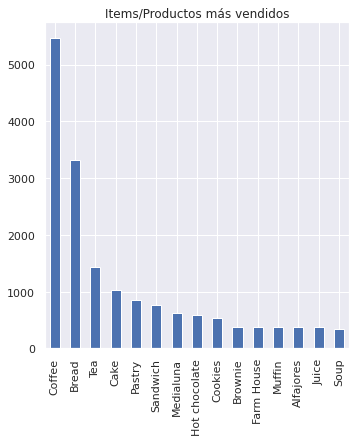

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items/Productos más vendidos')

Claramente, el café es el artículo más vendido, seguido de pan, té, pasteles y pasteles, respectivamente. Esto tiene sentido para una panadería. Ahora que sabemos cuáles son los artículos más populares, veamos qué meses generan la mayor cantidad de ventas.

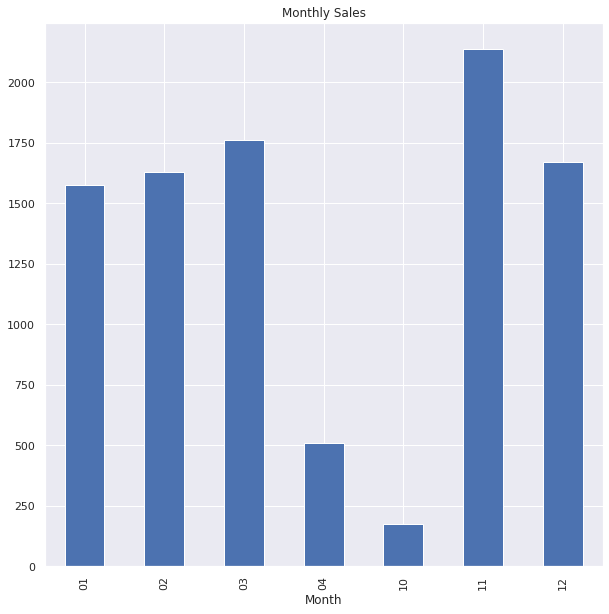

In [ ]:
df.groupby('Month')['Transaction'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

¡Esto se está poniendo interesante! Vemos algunas grandes diferencias aquí. Como ejercicio para los curiosos, quizás valdría la pena descubrir si esta drástica diferencia en las ventas se debe a que el conjunto de datos tiene menos datos para abril y octubre. Esto tendría sentido, ya que son los meses atípicos en el conjunto de datos. Verifiquemos si hay menos transacciones diarias registradas para estos meses en comparación con las demás.

In [ ]:
print(df.groupby('Month')['Day'].nunique())

Month
01    30
02    28
03    31
04     9
10     2
11    30
12    29
Name: Day, dtype: int64


¡Mira eso! Esta intuición era correcta. Solo se registraron 9 días de transacciones para abril y 2 días para octubre.

# Market Basket Analysis

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

Ahora creemos una lista de las transacciones únicas para que podamos transformar nuestros datos en el formato correcto usando TransactionEncoder.

In [ ]:
transaction_list = []

# For loop para crear una lista de las transacciones únicas en todo el conjunto de datos:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

Ahora apliquemos a priori. Usaré el parámetro min_threshold en las reglas de asociación para que la métrica de elevación sea 1.0 porque si es menor que uno, entonces es probable que los dos artículos no se compren juntos. Ordenaremos los valores por confianza para ver la probabilidad de que se compre un artículo si se compra su antecedente.

In [ ]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


# Conclusiones

¡Muy genial! Aquí vemos claramente resultados significativos de nuestro análisis que se muestra arriba, donde cuanto mayor es el valor de elevación, mayor es la correlación entre los elementos. Los datos muestran claramente que el café es un consecuente popular, lo cual tiene sentido porque es una panadería. Además del café, veamos las correlaciones de elementos más interesantes (formato: antecedente (s) -> consecuente):

- Pastry (Pasteleros) -> Pan
- Pastel -> Té
- (Café + Té) -> Pastel
- Sandwhich -> Té
- Chocolate caliente -> Pastel
    

**Entonces, ¿cómo es este conocimiento útil para la panadería?**

Las empresas siempre buscan optimizar su configuración y aumentar sus ventas. Las panaderías no son diferentes, y este tipo de análisis también podría haberse realizado para cualquier tipo de tienda minorista o mercado. Debido a que ahora conocemos la correlación entre los artículos y el interés común de los clientes, la empresa puede tomar decisiones basadas en estos hallazgos. 

Por ejemplo, esta panadería podría querer colocar su pan recién horneado cerca de sus pasteles, ya que los clientes que compran pasteles también parecen sentirse atraídos por el pan. 

Además de la colocación del producto, la panadería también podría estar interesada en tener una promoción de un artículo gratis, dadas las grandes posibilidades de que se venda otro artículo como resultado (por ejemplo, si regalaran algunos de sus tostadas especiales gratuitas) día, podría no solo atraer nuevos clientes frecuentes, sino que también hay una muy buena posibilidad de que el cliente aún gaste dinero en café).